Mean Squared Error: 4.28
R-squared: 0.01


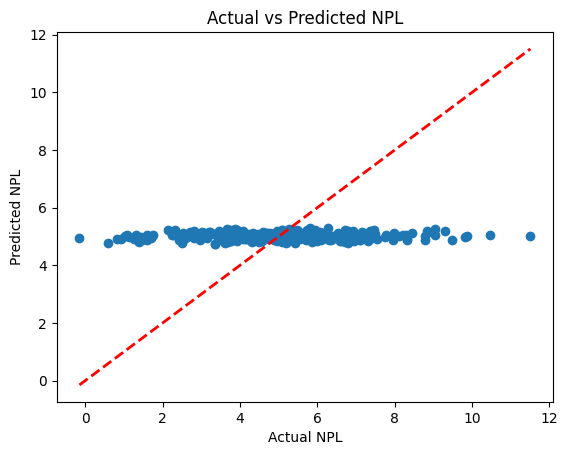

Predicted NPL values:
       Actual NPL  Predicted NPL
1178    6.835935       4.874663
865     4.682767       5.138134
101     6.055921       5.007976
439     2.260394       5.075727
58      4.037504       5.096716
1120    6.216884       4.971308
323     5.095908       4.793506
974     3.920025       4.856195
411     6.086596       5.090417
855     5.000843       5.092375
820     5.028546       4.994329
44      4.769053       5.117704
49      9.489613       4.866923
849     7.544118       4.925897
240     1.132643       4.997622
170     0.583787       4.761572
523     3.701469       4.818217
765     4.285109       4.859098
838     2.495213       4.771351
423     7.495484       5.074737
380     5.208402       4.953428
609    10.461734       5.065053
676     3.026428       5.013089
344     2.540261       5.117261
109     6.715729       5.214052
277     2.485319       4.987248
677     7.964045       4.864264
570     5.706966       4.883950
358     3.578256       4.795865
598     5.159987 

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generate synthetic data for illustration
np.random.seed(42)

# Assume three features: Population, GDP, and Credit Score
cities = ['Jakarta', 'Surabaya', 'Bandung', 'Medan', 'Semarang', 'Makassar', 'Palembang', 'Batam', 'Banjarmasin', 'Padang']
num_cities = len(cities)

# Generate monthly data for the last decade (120 months)
months = pd.date_range('2013-01-01', periods=120, freq='M')

# Generate data for each city
data = []
for city in cities:
    population = np.random.randint(500000, 15000000, size=len(months))
    gdp = np.random.randint(50000, 1000000, size=len(months))
    credit_score = np.random.uniform(300, 850, size=len(months))
    npl_data = np.random.normal(loc=5, scale=2, size=len(months))
    city_data = pd.DataFrame({'Month': months, 'City': city, 'Population': population, 'GDP': gdp, 'CreditScore': credit_score, 'NPL': npl_data})
    data.append(city_data)

# Combine data for all cities into a single DataFrame
data = pd.concat(data, ignore_index=True)

# Split the data into features (X) and target variable (y)
X = data[['Population', 'GDP', 'CreditScore']]
y = data['NPL']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
LR = LinearRegression()
LR.fit(X_train, y_train)

# Make predictions on the test dataset
y_predict = LR.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

# Print the evaluation metrics
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Visualize the results
plt.scatter(y_test, y_predict)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual NPL')
plt.ylabel('Predicted NPL')
plt.title('Actual vs Predicted NPL')
plt.show()


# Print the first few predicted values
print("Predicted NPL values:\n", pd.DataFrame({'Actual NPL': y_test, 'Predicted NPL': y_predict}).head(30))



## Predicted NPL Values:

For the provided examples (assuming indices 1178, 865, 101, 439, and 58):

- **Index 1178:**
  - Actual NPL: 6.835935
  - Predicted NPL: 4.874663

- **Index 865:**
  - Actual NPL: 4.682767
  - Predicted NPL: 5.138134

- **Index 101:**
  - Actual NPL: 6.055921
  - Predicted NPL: 5.007976

- **Index 439:**
  - Actual NPL: 2.260394
  - Predicted NPL: 5.075727

- **Index 58:**
  - Actual NPL: 4.037504
  - Predicted NPL: 5.096716

## Evaluation Metrics:

- **Mean Squared Error (MSE):** 4.28
- **R-squared (R²):** 0.01

## Interpretation:

- The model's predictions, as indicated by the MSE and R² values, are not highly accurate.
- The MSE of 4.28 suggests a moderate level of prediction error, indicating that the model's predictions deviate from the actual values.
- The R² value of 0.01 is low, indicating that the model has limited explanatory power and does not capture a substantial portion of the variance in the NPL data.

## Conclusion:

- The model's performance, based on the provided metrics, is not satisfactory.
- There is a significant discrepancy between the predicted and actual NPL values.
- Consider exploring more sophisticated models, feature engineering, or addressing potential issues with the data to enhance predictive performance.
- Additionally, assess whether linear regression is the most suitable model for this dataset or if more complex models might provide better results.

It's important to note that these interpretations are based on the specific characteristics of the dataset and the context of the problem. Further analysis and model refinement may be necessary to improve predictive accuracy.
